In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# import plotly.express as plt

In [2]:
df = pd.read_csv('data/data.csv')
df.tail()

,date,time,min_temp,max_temp,avg_temp,humidity,AQI,baro_pressure
3222,2022-12-20,06:00:00,8.3,12.2,10.25,39.16,267,1014.0
3223,2022-12-20,07:00:00,8.4,12.3,10.35,35.78,268,1014.0
3224,2022-12-20,08:00:00,8.2,12.0,10.10,33.34,274,1015.0
3225,2022-12-20,09:00:00,10.6,16.6,13.60,31.58,268,1016.0
3226,2022-12-20,10:00:00,14.2,20.2,17.20,25.70,265,1016.0


In [3]:
df.date.unique()

array(['2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
       '2022-08-12', '2022-08-13', '2022-08-14', '2022-08-15',
       '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19',
       '2022-08-20', '2022-08-21', '2022-08-22', '2022-08-23',
       '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27',
       '2022-08-28', '2022-08-29', '2022-08-30', '2022-08-31',
       '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
       '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
       '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12',
       '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
       '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
       '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
       '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
       '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
       '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
       '2022-10-07', '2022-10-08', '2022-10-09', '2022-

In [4]:
df.columns

Index(['date', 'time', 'min_temp', 'max_temp', 'avg_temp', 'humidity', 'AQI',
       'baro_pressure'],
      dtype='object')

In [5]:
df.dtypes

date              object
time              object
min_temp         float64
max_temp         float64
avg_temp         float64
humidity         float64
AQI                int64
baro_pressure    float64
dtype: object

In [6]:
df.drop_duplicates(subset="date", keep="last", inplace=True)

In [7]:
df.tail()

,date,time,min_temp,max_temp,avg_temp,humidity,AQI,baro_pressure
3143,2022-12-16,23:00:00,9.7,15.7,12.70,94.76,273,1014.0
3167,2022-12-17,23:00:00,9.4,14.1,11.75,44.80,266,1017.0
3191,2022-12-18,23:00:00,9.3,13.6,11.45,50.35,269,1016.0
3215,2022-12-19,23:00:00,9.0,13.1,11.05,52.13,266,1016.0
3226,2022-12-20,10:00:00,14.2,20.2,17.20,25.70,265,1016.0


In [8]:
df ['date'] = pd.to_datetime(df['date'])
df.tail()

,date,time,min_temp,max_temp,avg_temp,humidity,AQI,baro_pressure
3143,2022-12-16,23:00:00,9.7,15.7,12.70,94.76,273,1014.0
3167,2022-12-17,23:00:00,9.4,14.1,11.75,44.80,266,1017.0
3191,2022-12-18,23:00:00,9.3,13.6,11.45,50.35,269,1016.0
3215,2022-12-19,23:00:00,9.0,13.1,11.05,52.13,266,1016.0
3226,2022-12-20,10:00:00,14.2,20.2,17.20,25.70,265,1016.0


In [9]:
df.dtypes

date             datetime64[ns]
time                     object
min_temp                float64
max_temp                float64
avg_temp                float64
humidity                float64
AQI                       int64
baro_pressure           float64
dtype: object

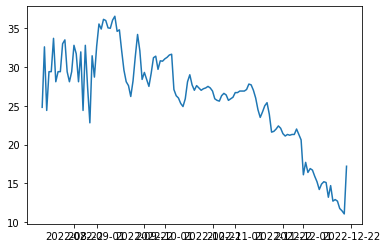

In [10]:
plt.plot(df['date'], df['avg_temp'])
plt.show()

In [11]:
new_column = df[['date', 'avg_temp']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

,ds,y
3143,2022-12-16,12.70
3167,2022-12-17,11.75
3191,2022-12-18,11.45
3215,2022-12-19,11.05
3226,2022-12-20,17.20


In [12]:
n = NeuralProphet()
model = n.fit(new_column, freq='D', epochs=3000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.259% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.


Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [13]:
future = n.make_future_dataframe(new_column, periods=20)
forecast = n.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.259% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_weekly
0,2022-12-21,None,10.814674,11.147670,-0.332995
1,2022-12-22,None,10.577992,10.787270,-0.209277
2,2022-12-23,None,10.016492,10.426864,-0.410372
3,2022-12-24,None,9.919221,10.066458,-0.147237
4,2022-12-25,None,9.660557,9.706052,-0.045495


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


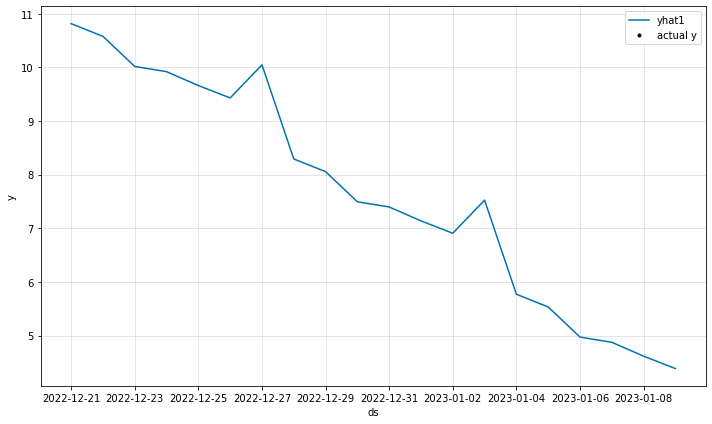

In [14]:
plot = n.plot(forecast)